In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.sample(5)

,Category,Message
5422,ham,Ok k..sry i knw 2 siva..tats y i askd..
2395,ham,"Babe, I'm back ... Come back to me ..."
2722,ham,It's justbeen overa week since we broke up and...
4157,ham,It certainly puts things into perspective when...
5437,ham,Am slow in using biola's fne


In [5]:
df.shape

(5572, 2)

# 1. Data Cleaning

In [6]:
#info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
#rename all columns name as our own favour
df.rename(columns={'Category': 'target', 'Message':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#label encode
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#finding null values
df.isna().sum()

target    0
text      0
dtype: int64

In [11]:
#check for duplicate values
df.duplicated().sum()

403

In [12]:
#remove duplicate values
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

# EDA (Exploratry Data Analysis)

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

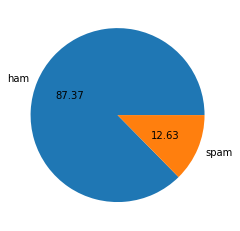

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [18]:
#data is imbalanced

In [19]:
import nltk 
# use to find how many word charecter or sentence use in the dataset row

In [20]:
nltk.download('punkt') # download dependencies

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khanm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
#fatch number of char in the full sentence
df['num_char']=df['text'].apply(len)
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
#no of word
df['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [23]:
df['num_word'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
#no of sentence
df['text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [25]:
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_char,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_char','num_word','num_sentence']].describe()

,num_char,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.978332,18.453279,1.947185
std,58.236795,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
#ham
df[df.target == 0][['num_char','num_word','num_sentence']].describe()

,num_char,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459699,17.120903,1.799601
std,56.358868,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
#spam
df[df.target == 1][['num_char','num_word','num_sentence']].describe()

,num_char,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [29]:
import seaborn as sn

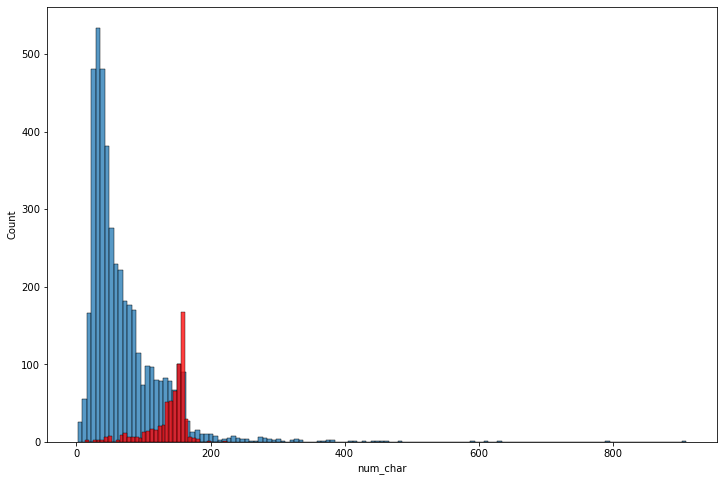

In [30]:
#to show ratio between ham & spam char
plt.figure(figsize=(12,8))
sn.histplot(df.num_char[df.target == 0])
sn.histplot(df.num_char[df.target == 1],color='red')
plt.show()

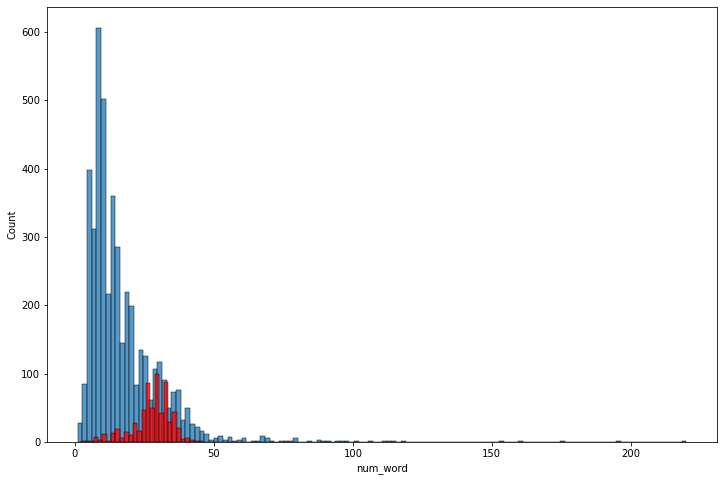

In [31]:
#to show ratio between ham & spam word
plt.figure(figsize=(12,8))
sn.histplot(df.num_word[df.target == 0])
sn.histplot(df.num_word[df.target == 1],color='red')
plt.show()

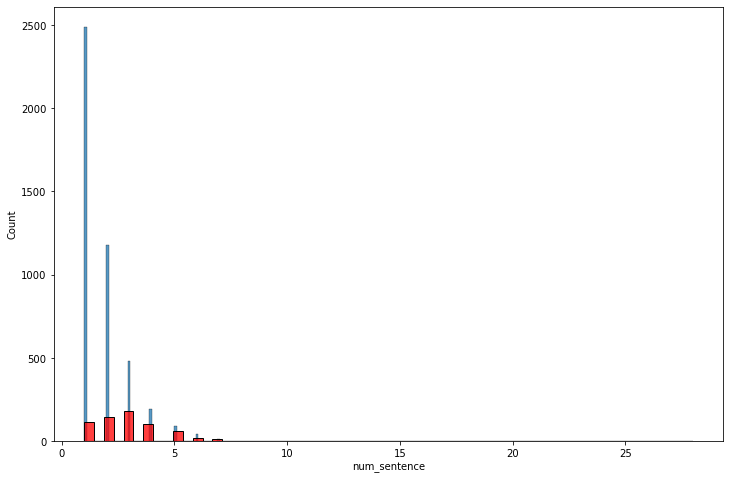

In [32]:
#to show ratio between ham & spam sentence
plt.figure(figsize=(12,8))
sn.histplot(df.num_sentence[df.target == 0])
sn.histplot(df.num_sentence[df.target == 1],color='red')
plt.show()

<Figure size 864x1080 with 0 Axes>

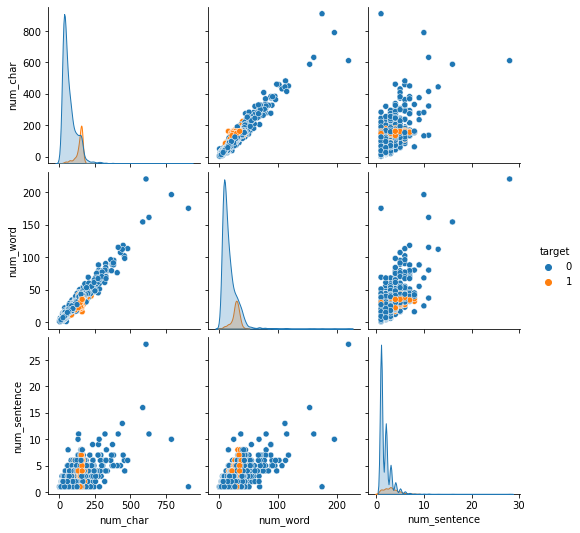

In [33]:
# relation between columns
plt.figure(figsize=(12,15))
sn.pairplot(df,hue='target')
plt.show()

<AxesSubplot:>

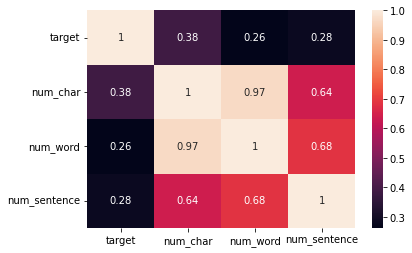

In [34]:
#find correlation between columns
sn.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing

In [35]:
#lower case
def transform_text(text):
    return text.lower()

transform_text("Hi How Are** You")

'hi how are** you'

In [36]:
#tokenize
def transform_text(text):
    return nltk.word_tokenize(text)

transform_text("Hi..... How Are** You")

['Hi', '.....', 'How', 'Are', '*', '*', 'You']

In [37]:
#Removing special characters
def transform_text(text):
    text = nltk.word_tokenize(text)
    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)
    return y

transform_text("Hi How Are 20** You")

['Hi', 'How', 'Are', '20', 'You']

In [38]:
#stop word
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khanm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
#Removing stop words and punctuation
def transform_text(text):
    text = nltk.word_tokenize(text)
    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    return y

transform_text("hi.... how are 20** you monaem?")

['hi', '20', 'monaem']

In [41]:
#Stemming ##bring all word to its root word
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [42]:
# now marge all this together
def transform_text(text):
    text = text.lower() #lower case
    text = nltk.word_tokenize(text) # tokenize
    y =[]
    
    #Removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)
    
    # remove special charecter and puntuation
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    #steming
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [43]:
transform_text('Hi..... How you doing Monaem? with your 20% money, shoping or lectures?')

'hi monaem 20 money shope lectur'

In [44]:
df.text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [45]:
transform_text(df.text[0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [46]:
df['transform_text'] = df.text.apply(transform_text)

In [47]:
df.head()

,target,text,num_char,num_word,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
#word cloud to show frequently used word
from wordcloud import WordCloud
wc = WordCloud(width=1500,height=1500,min_font_size=10,background_color='white')

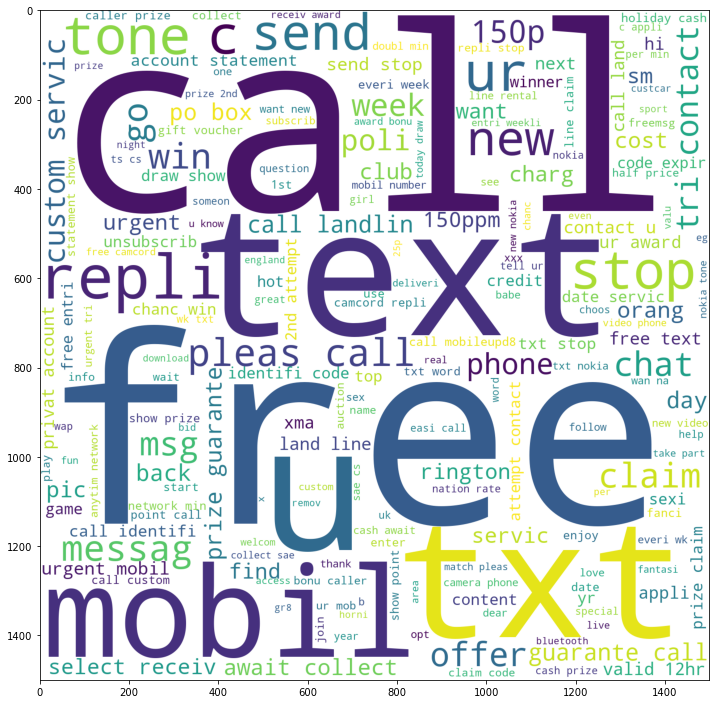

In [49]:
spam_wc = wc.generate(df.transform_text[df.target==1].str.cat(sep=" "))
plt.figure(figsize=(12,15))
plt.imshow(spam_wc)
plt.show()

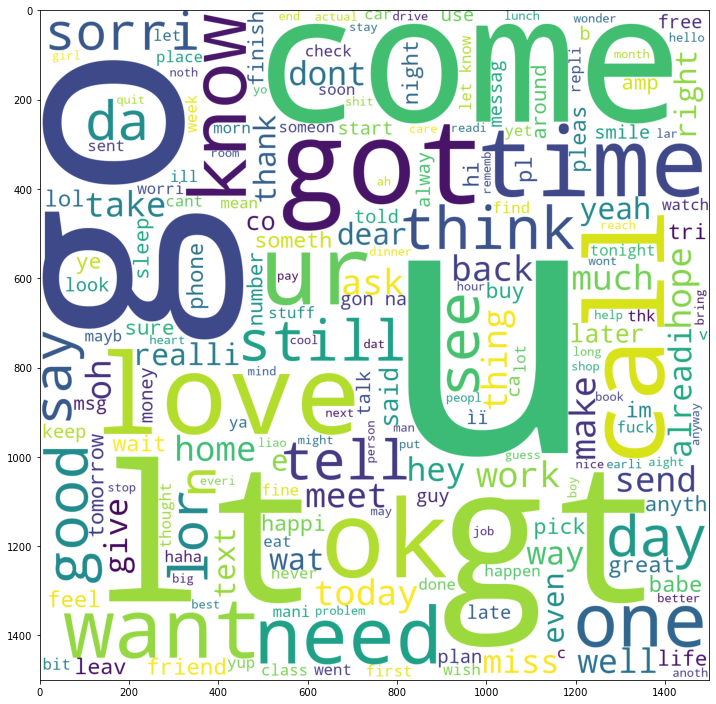

In [50]:
ham_wc = wc.generate(df.transform_text[df.target==0].str.cat(sep=" "))
plt.figure(figsize=(12,15))
plt.imshow(ham_wc)
plt.show()

In [51]:
# how many word are use in spam
spam_corpas = []
for msg in df.transform_text[df.target == 1].tolist():
    for word in msg.split():
        spam_corpas.append(word)
len(spam_corpas)

9939

In [52]:
from collections import Counter
pd.DataFrame(Counter(spam_corpas).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\khanm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


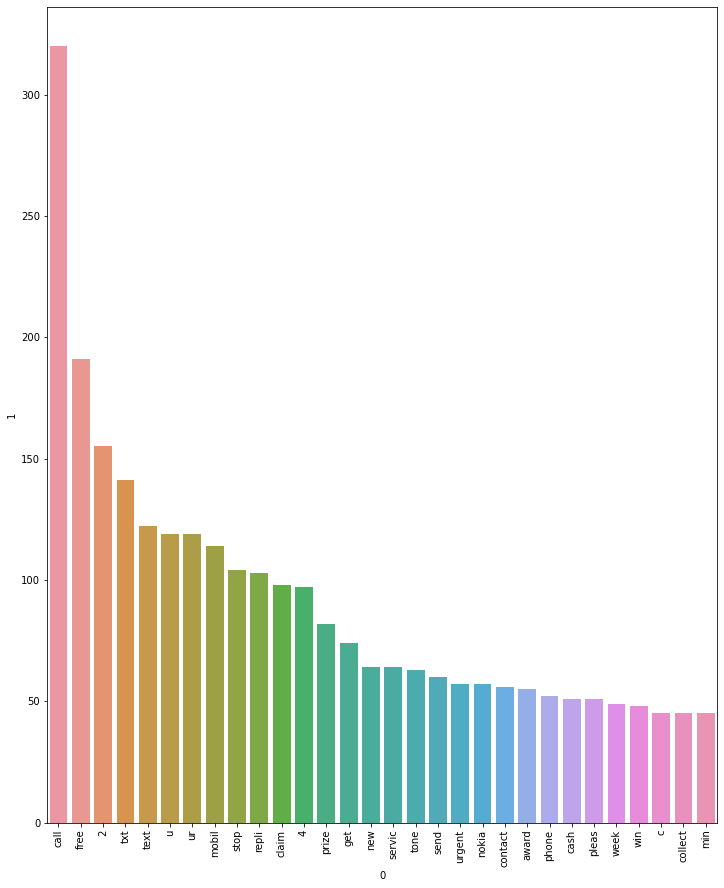

In [53]:
plt.figure(figsize=(12,15))
sn.barplot(pd.DataFrame(Counter(spam_corpas).most_common(30))[0],pd.DataFrame(Counter(spam_corpas).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
ham_corpas = []
for msg in df.transform_text[df.target == 0].tolist():
    for word in msg.split():
        ham_corpas.append(word)
len(ham_corpas)

35394

In [55]:
pd.DataFrame(Counter(ham_corpas).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\Users\khanm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


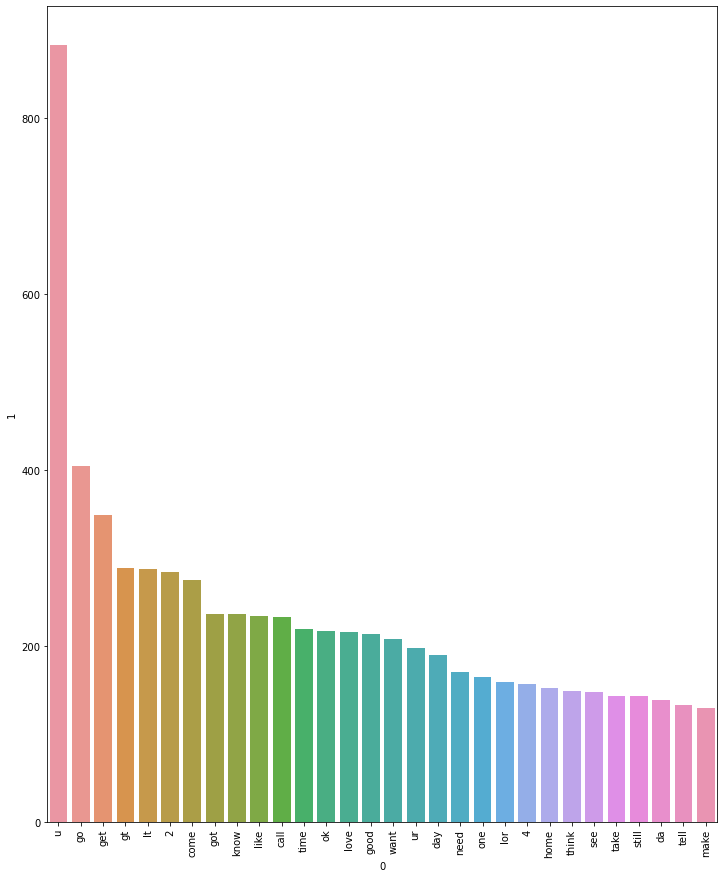

In [56]:
plt.figure(figsize=(12,15))
sn.barplot(pd.DataFrame(Counter(ham_corpas).most_common(30))[0],pd.DataFrame(Counter(ham_corpas).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [58]:
X= tfidf.fit_transform(df.transform_text).toarray()
X.shape

(5169, 3000)

In [59]:
y = df.target.values
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.8694390715667312
0.5068493150684932
[[788 108]
 [ 27 111]]


In [64]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [65]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


In [66]:
import pickle
pickle.dump(tfidf,open('vectorizer.pk1','wb'))
pickle.dump(mnb,open('model.pk1','wb'))

# Mixing Models

In [67]:
#voting
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier

In [68]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
etc = ExtraTreeClassifier(random_state=2)

In [69]:
from sklearn.ensemble import VotingClassifier

In [70]:
voting = VotingClassifier(estimators=[('svm',svc), ('nb',mnb), ('et', etc)], voting='soft')

In [71]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et', ExtraTreeClassifier(random_state=2))],
                 voting='soft')

In [72]:
y_pred = voting.predict(x_test)
print("Accuricy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))

Accuricy 0.9729206963249516
precision 0.9583333333333334


In [73]:
#apply stacking
from sklearn.ensemble import RandomForestClassifier

In [74]:
estimators=[('svm',svc), ('nb',mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [75]:
from sklearn.ensemble import StackingClassifier

In [76]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [77]:
clf.fit(x_train,y_train)

StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('et', ExtraTreeClassifier(random_state=2))],
                   final_estimator=RandomForestClassifier())

In [78]:
y_pred = clf.predict(x_test)
print("Accuricy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))

Accuricy 0.9796905222437138
precision 0.9465648854961832
